# CS251/2: Data Analysis and Visualization

## Polynomial Regression Examples and Applications

Spring 2021

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [2]:
import data

## Load in Boston Housing data

CSV filename: `boston.csv`

In [3]:
bostonData = data.Data('boston.csv')
print(bostonData)

-------------------------------
boston.csv (506x13)
Headers:
  crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	lstat	medv
-------------------------------
Showing first 5/506 rows.
0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.09	1.0	296.0	15.3	4.98	24.0
0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	9.14	21.6
0.02729	0.0	7.07	0.0	0.469	7.185	61.1	4.9671	2.0	242.0	17.8	4.03	34.7
0.03237	0.0	2.18	0.0	0.458	6.998	45.8	6.0622	3.0	222.0	18.7	2.94	33.4
0.06905	0.0	2.18	0.0	0.458	7.147	54.2	6.0622	3.0	222.0	18.7	5.33	36.2

-------------------------------


Info on the headers:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 dollars
    PTRATIO - pupil-teacher ratio by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000's dollars
    

## 1. Perform linear regression to predict median home value from distance to workplace hubs

Independent and dependent variables?

In [ ]:
# ind var: distance to workplace
# dep var: median home value

In [4]:
dis = bostonData.select_data(['dis'])
medv = bostonData.select_data(['medv'])

In [6]:
A = np.hstack([np.ones([dis.shape[0], 1]), dis])
A.shape

(506, 2)

In [7]:
y = medv

In [9]:
c, _, _, _ = lstsq(A, y)
print(c)

[[18.39008833]
 [ 1.09161302]]


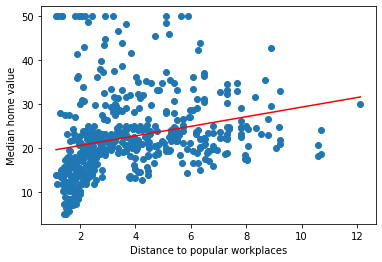

In [12]:
x = np.linspace(np.min(dis), np.max(dis))
yLine = c[0] + c[1]*x

plt.scatter(dis, medv)
plt.plot(x, yLine, 'red')
plt.xlabel('Distance to popular workplaces')
plt.ylabel('Median home value')
plt.show()

## 2. Use polynomial regression to better fit the nonlinear data relationship

### Try Quadratic polynomial model:

$$y = c_0 + c_1x_1 + c_2x_1^2$$

where $x_1$ is what?

In [13]:
dis.shape

(506, 1)

In [17]:
# Need to figure out appropriate A
# y is unchanged. That is median home value data
Ap = np.zeros([len(dis), 3])
Ap[:, 0] = np.squeeze(np.ones([len(dis), 1]))
Ap[:, 1] = np.squeeze(dis)
Ap[:, 2] = np.squeeze(dis**2)
print(Ap)
print(Ap.shape)

[[ 1.          4.09       16.7281    ]
 [ 1.          4.9671     24.67208241]
 [ 1.          4.9671     24.67208241]
 ...
 [ 1.          2.1675      4.69805625]
 [ 1.          2.3889      5.70684321]
 [ 1.          2.505       6.275025  ]]
(506, 3)


In [19]:
c, _, _, _ = lstsq(Ap, y)
print(c)

[[12.74347795]
 [ 4.13316926]
 [-0.31316923]]


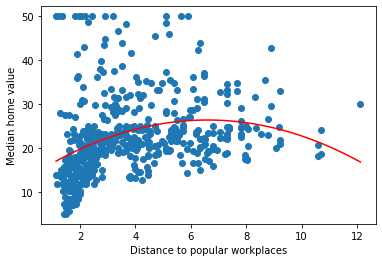

In [20]:
x = np.linspace(np.min(dis), np.max(dis))
yCurve = c[0] + c[1]*x + c[2]*(x**2)

plt.scatter(dis, medv)
plt.plot(x, yCurve, 'red')
plt.xlabel('Distance to popular workplaces')
plt.ylabel('Median home value')
plt.show()

### Now let's try a cubic model

$$y = c_0 + c_1x_1 + c_2x_1^2 + c_3x_1^3$$

In [21]:
Ap = np.zeros([len(dis), 4])
Ap[:, 0] = np.squeeze(np.ones([len(dis), 1]))
Ap[:, 1] = np.squeeze(dis)
Ap[:, 2] = np.squeeze(dis**2)
Ap[:, 3] = np.squeeze(dis**3)
print(Ap)
print(Ap.shape)

[[  1.           4.09        16.7281      68.417929  ]
 [  1.           4.9671      24.67208241 122.54870054]
 [  1.           4.9671      24.67208241 122.54870054]
 ...
 [  1.           2.1675       4.69805625  10.18303692]
 [  1.           2.3889       5.70684321  13.63307774]
 [  1.           2.505        6.275025    15.71893762]]
(506, 4)


In [22]:
c, _, _, _ = lstsq(Ap, y)
print(c)

[[ 7.03789409]
 [ 8.59284424]
 [-1.24952806]
 [ 0.05601936]]


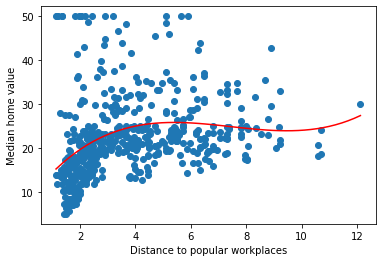

In [23]:
x = np.linspace(np.min(dis), np.max(dis))
yCurve = c[0] + c[1]*x + c[2]*(x**2) + c[3]*(x**3)

plt.scatter(dis, medv)
plt.plot(x, yCurve, 'red')
plt.xlabel('Distance to popular workplaces')
plt.ylabel('Median home value')
plt.show()